# Logistic Regression

This statistical method is used for binary classification tasks (despite the name!), in addition to the perceptron. The main difference for logistic regression is that the data is not easily separable. As such, instead of predicting whether or not an input belongs to one category or the other, we predict the probability that the instance belongs to a particular category. 

<p align="center">
    <img src="logistic regression.jpg" width="500">
</p>

Logistic regression uses the Sigmoid Function to map the inputs to a value between 0 and 1. This is how it looks like: 

$\sigma(z) = \frac{1}{1 + e^{-z}}$

z is the linear combination of the inputs and weights. So, $z= w_1x_1 + w_2x_2+....w_nx_n + b$. The sigmoid function predicts a probability, denoted $\hat{y}$. 

In order to train te model, we define a cost function. Commonly, we use the Binary Cross Entropy Function: 

$J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} (y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i))$

In order to minimize this cost value, we use gradient descent again! This means updating each instance with a learning rate, $\alpha$:

$\theta_j = \theta_j - \alpha\frac{d}{d\theta_j}J(\theta)$

There also exists multinomial and ordinal logistic regresison types, but we focus on binary classification for our single-neuron model.





# Application

[heart attack dataset here](https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility)

In this notebook, we will be predicting if someone will get a heart attack based on two factors: age and maximum heart rate. You will notice that the correlation between these two factors is a bit weak, but we will continue for the sake of experiment.

This is how our Bernoulli function looks like:

\[$
    P(y= 1 | x) = \begin{cases}
    yhat & \text{if }  y =1 \\
    1-yhat  & \text{if } y = 0 
\end{cases}$
\]



In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import SingleNeuron as node


# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\heart.csv")

live = df[df.target == 0]
die = df[df.target == 1]


Let's visualize our data! We will also compress it such that if one gets a heart attack, they are assigned the value 1, and if not, they ae assigned the value 0.

Length of live.thalach: 499
Length of die.thalach: 526


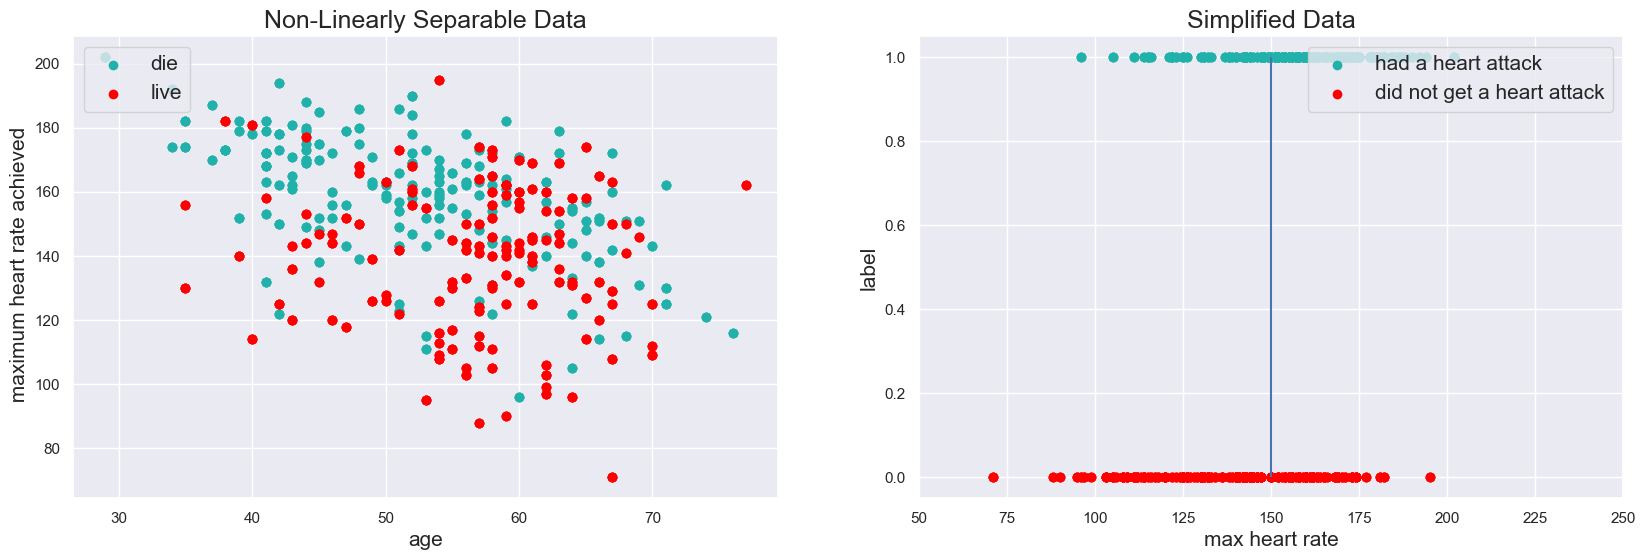

In [170]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))


ax1.scatter(die.age, 
            die.thalach, 
            color = "lightseagreen", 
            label = "die")
ax1.scatter(live.age, 
            live.thalach, 
            color = "red", 
            label = "live")
ax1.set_xlabel("age", fontsize = 15)
ax1.set_ylabel(" maximum heart rate achieved", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Non-Linearly Separable Data", fontsize = 18)


ax2.set_xlim((50, 250))
ax2.scatter(die.thalach, 
            np.ones(526), 
            color = "lightseagreen", 
            label = "had a heart attack")
ax2.scatter(live.thalach, 
            np.zeros(499), 
            color = "red", 
            label = "did not get a heart attack")
ax2.vlines(150, 0.0, 1)
ax2.set_xlabel("max heart rate", fontsize = 15)
ax2.set_ylabel("label", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper right")
ax2.set_title("Simplified Data", fontsize = 18)


print("Length of live.thalach:", len(live.thalach))
print("Length of die.thalach:", len(die.thalach))

This is BARELY linear. There is so much overlap that using the Perceptron would be pretty much impossible. However, we notice that a correlation does exist, though small, does exist, and we can use logistic regression to predict probabilities. live= 1, die= 0. 

Next, we define our main functions: the sigmoid function and the binary cross entropy loss function.

In [171]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

Then, we train the model.

In [172]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [173]:


X = df.iloc[50:, [8]].values #iloc to choose training data
X = X.reshape(-1, 1)
y = np.where(df.target == 1, 0, 1) #IS IT 0, 1 OR 1, 0
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SingleNeuron(sigmoid, cross_entropy_loss)

model.train(X, y, alpha = 0.001, epochs = 1000)


#IMPORT SINGLE NEURON!!!!

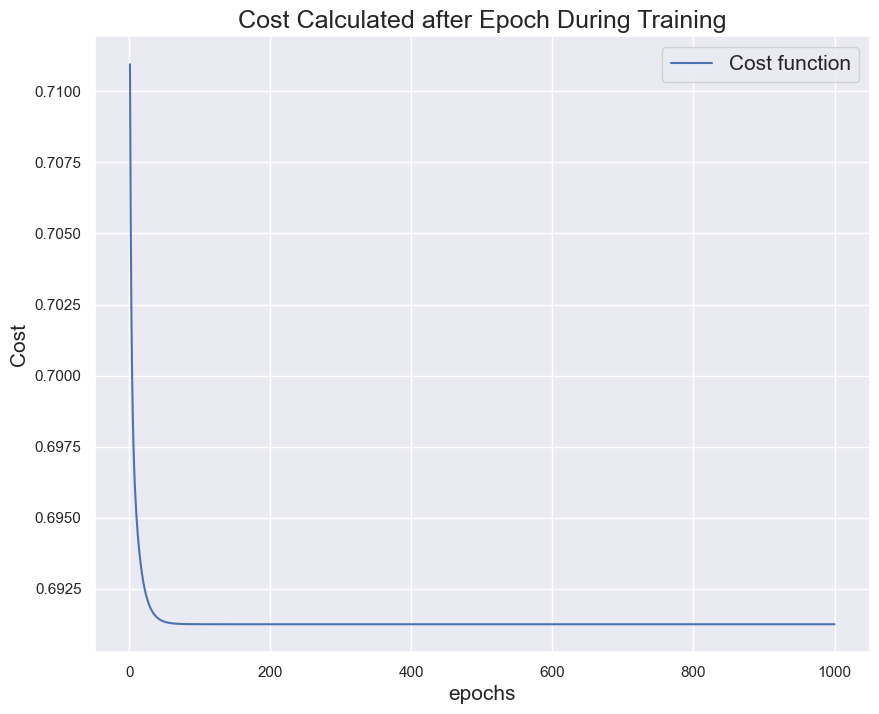

In [174]:

model.plot_cost_function()
plt.show()


---

This looks good! Visualizing the cost function over the epochs during training helps us verify that are neuron is indeed learning over time. We can next visualize our hypthesis function, or prediction function (recall in all supervised machine learning we are learning a function $h$ which approximates the true target function $f$), by plotting the ```SingleNeuron.predict()``` method over the scattered data points in question. This can be done by running the following code in the cell below.


---

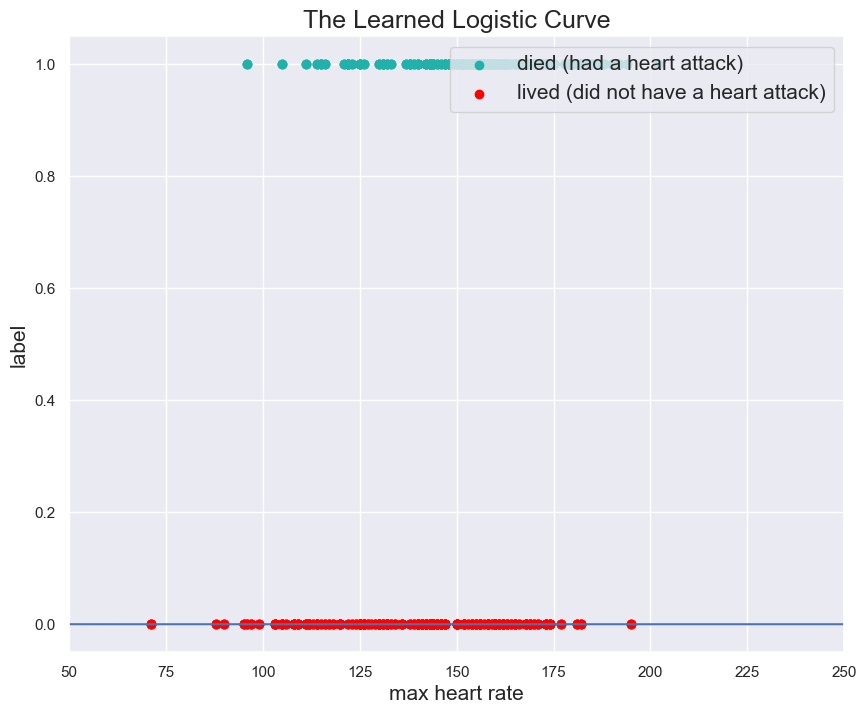

In [175]:
plt.figure(figsize = (10, 8))
plt.xlim((50,250 ))
plt.scatter(die.thalach, 
            np.ones(526), 
            color = "lightseagreen", 
            label = "died (had a heart attack)")
plt.scatter(live.thalach, 
            np.zeros(499), 
            color = "red", 
            label = "lived (did not have a heart attack)")

domain = np.linspace(50, 250, 100)
plt.plot(domain, model.predict(domain.reshape(-1, 1)))
plt.xlabel("max heart rate", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

What is this? We see that the Sigmoid function does not map well to this dataset! Let's see why by printing the predictions

In [176]:
model.predict(X)

array([0.49884978, 0.45011957, 0.49884978, 0.49884978, 0.45011957,
       0.45011957, 0.49884978, 0.49884978, 0.49884978, 0.49884978,
       0.49884978, 0.49884978, 0.45011957, 0.49884978, 0.49884978,
       0.49884978, 0.49884978, 0.45011957, 0.49884978, 0.49884978,
       0.45011957, 0.45011957, 0.45011957, 0.45011957, 0.45011957,
       0.49884978, 0.49884978, 0.45011957, 0.49884978, 0.49884978,
       0.49884978, 0.49884978, 0.49884978, 0.49884978, 0.49884978,
       0.49884978, 0.49884978, 0.45011957, 0.49884978, 0.49884978,
       0.49884978, 0.49884978, 0.45011957, 0.45011957, 0.49884978,
       0.45011957, 0.49884978, 0.45011957, 0.49884978, 0.49884978,
       0.49884978, 0.49884978, 0.49884978, 0.49884978, 0.49884978,
       0.45011957, 0.45011957, 0.49884978, 0.49884978, 0.45011957,
       0.49884978, 0.45011957, 0.45011957, 0.45011957, 0.49884978,
       0.45011957, 0.49884978, 0.45011957, 0.49884978, 0.49884978,
       0.49884978, 0.45011957, 0.45011957, 0.49884978, 0.45011

Next we calculate the error.

In [177]:
np.rint(model.predict(X)) != y

C:\Users\faith\AppData\Local\Temp\ipykernel_4536\951163558.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.rint(model.predict(X)) != y


True

In [178]:
classification_error = (np.rint(model.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

C:\Users\faith\AppData\Local\Temp\ipykernel_4536\914351833.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  classification_error = (np.rint(model.predict(X)) != y).astype(int)


AttributeError: 'bool' object has no attribute 'astype'

Not bad! We then visualize the decision boundary.

In [ ]:
model.plot_decision_boundary(X, y)
plt.show()

ValueError: y and X must contain the same number of samples. Got y: 1025, X: 975

<Figure size 1000x800 with 0 Axes>